<h1><font color="aquamarine">K Fall Data Preprocessing</font></h1>

<h3><font color="lightblue">Importing Libraries</font></h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import os
import random

<h3><font color="lightblue">Setup Paths and Constants</font></h3>

In [13]:
sensor_train_feature_path = "./datasets/sensor/sensor_data/"
sensor_train_label_path = "./datasets/sensor/label_data/"

<h3><font color="lightblue">Importing dataset</font></h3>

In [5]:
## Counting the number of samples in the entire dataset

count = 0
for folder in os.listdir(sensor_train_feature_path):
    print(folder)
    folder_count = 0
    for csv_file in os.listdir(os.path.join(sensor_train_feature_path,folder)):
        folder_count +=1
    print("current_total: ",count)
    print("folder_count:",folder_count)
    count = count+folder_count
print("Total: ",count)

SA06
current_total:  0
folder_count: 156
SA07
current_total:  156
folder_count: 150
SA08
current_total:  306
folder_count: 163
SA09
current_total:  469
folder_count: 153
SA10
current_total:  622
folder_count: 159
SA11
current_total:  781
folder_count: 163
SA12
current_total:  944
folder_count: 142
SA13
current_total:  1086
folder_count: 160
SA14
current_total:  1246
folder_count: 162
SA15
current_total:  1408
folder_count: 162
SA16
current_total:  1570
folder_count: 163
SA17
current_total:  1733
folder_count: 161
SA18
current_total:  1894
folder_count: 160
SA19
current_total:  2054
folder_count: 158
SA20
current_total:  2212
folder_count: 156
SA21
current_total:  2368
folder_count: 163
SA22
current_total:  2531
folder_count: 161
SA23
current_total:  2692
folder_count: 163
SA24
current_total:  2855
folder_count: 153
SA25
current_total:  3008
folder_count: 163
SA26
current_total:  3171
folder_count: 161
SA27
current_total:  3332
folder_count: 157
SA28
current_total:  3489
folder_count: 1

In [6]:
def formatCSVAtPath(label_file):
    dataframe = pd.read_excel(os.path.join(sensor_train_label_path, label_file),keep_default_na=False)
    
    dataframe.drop(['Description'],axis=1,inplace=True)

    # cascading task id to the empty cells under it
    currentTaskID = None
    for row in range(len(dataframe)):
        if(dataframe.loc[row,'Task Code (Task ID)']):
            currentTaskID = dataframe.iloc[row]['Task Code (Task ID)']
        else:
            dataframe.loc[row,'Task Code (Task ID)'] = currentTaskID

    for row in range(len(dataframe)):
        dataframe.loc[row,'Task Code (Task ID)'] = dataframe.loc[row,'Task Code (Task ID)'][5:-1]
    

    # adding name of the file containing data for this entry
    dataframe['datapath'] = "S" + label_file[2:4] +"T" + dataframe['Task Code (Task ID)'].astype('str')+"R0"+ dataframe['Trial ID'].astype('str')

    #normalizing the classes
    dataframe['Task Code (Task ID)'] = dataframe['Task Code (Task ID)'].astype('int')
    dataframe['class'] = ""
    dataframe['class'][((dataframe['Task Code (Task ID)'] > 0) & (dataframe['Task Code (Task ID)']<20)) |  (dataframe['Task Code (Task ID)']>34)] = 0
    dataframe['class'][(dataframe['Task Code (Task ID)'] > 19) & (dataframe['Task Code (Task ID)']<35)] = 1
    return dataframe

    

In [14]:
final_data_path = "./sensor_data/"
final_feature_path = final_data_path + "features/"
final_label_path = final_data_path + "labels/"

#making feature and label directories
if(not os.path.exists(final_feature_path)):
    os.mkdir(final_feature_path)
    os.mkdir(final_label_path)




# T01-T19 and T35-T36 = Daily activities
# T20-T34 = Fall situations
# for label_file in os.listdir(sensor_train_label_path):
#     dataframe = formatCSVAtPath(label_file)
#     dataframe.to_csv(final_label_path+label_file[:-5]+".csv")
    




In [17]:
# finding min and max frames for each trial
label_path = "./sensor_data/labels/"
feature_path = "./sensor_data/features/"
frameno_dataframe = pd.DataFrame(columns=["Fall_onset_frame","Fall_impact_frame"])
fall_files = set()
for label_file in os.listdir(label_path):
    df = pd.read_csv(os.path.join(label_path,label_file))
    # print(df[["Fall_onset_frame","Fall_impact_frame"]].head(5))
    frameno_dataframe = frameno_dataframe.append(df[["Fall_onset_frame","Fall_impact_frame"]])
    fall_files.update(list(df['datapath']))
    # print(frameno_dataframe)

C:\Users\prach\AppData\Local\Temp\ipykernel_19308\1724893089.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frameno_dataframe = frameno_dataframe.append(df[["Fall_onset_frame","Fall_impact_frame"]])
C:\Users\prach\AppData\Local\Temp\ipykernel_19308\1724893089.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frameno_dataframe = frameno_dataframe.append(df[["Fall_onset_frame","Fall_impact_frame"]])
C:\Users\prach\AppData\Local\Temp\ipykernel_19308\1724893089.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frameno_dataframe = frameno_dataframe.append(df[["Fall_onset_frame","Fall_impact_frame"]])
C:\Users\prach\AppData\Local\Temp\ipykernel_19308\1724893089.py:9: FutureWarning: The frame.append method is deprecated a

In [18]:
frameno_dataframe["gap"] = frameno_dataframe["Fall_impact_frame"] -  frameno_dataframe['Fall_onset_frame']
frameno_dataframe

,Fall_onset_frame,Fall_impact_frame,gap
0,130,208,78
1,184,272,88
2,184,260,76
3,151,231,80
4,128,223,95
...,...,...,...
69,458,536,78
70,388,454,66
71,435,502,67
72,447,514,67


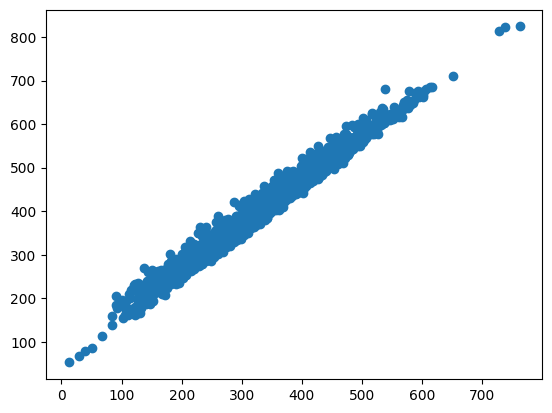

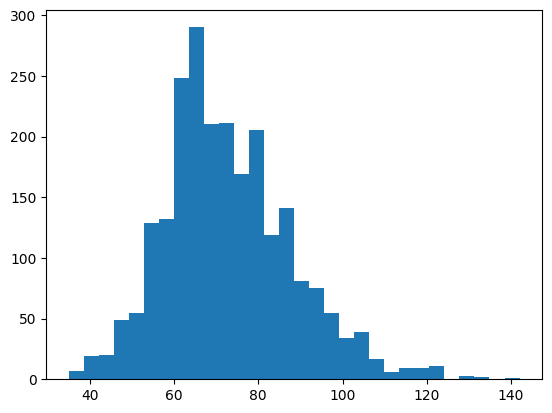

In [19]:
import matplotlib.pyplot as plt
plt.scatter(frameno_dataframe["Fall_onset_frame"],frameno_dataframe["Fall_impact_frame"])
plt.show()
plt.hist(frameno_dataframe["gap"],bins = 30)
plt.show()

In [2]:
all_files = set()
for folder in os.listdir(sensor_train_feature_path):
    for file in os.listdir(sensor_train_feature_path+folder):
        all_files.add(file[:-4])
notfall_files = all_files - fall_files

NameError: name 'os' is not defined

In [8]:
#for file copying
import shutil 

def isfallfile(filename):
    return int(filename[4:6])<35 and int(filename[4:6])>19
    
for folder in os.listdir(sensor_train_feature_path):
    for sensor_file in os.listdir(sensor_train_feature_path+folder):
        if isfallfile(sensor_file):
            shutil.copy(sensor_train_feature_path+folder+"/"+sensor_file,final_feature_path+"fall")
        else:
            shutil.copy(sensor_train_feature_path+folder+"/"+sensor_file,final_feature_path+"notfall")

In [9]:
def picksegment(start,end,filename):
    with open(filename) as f:
        f.readline()
        segment = f.readlines()[max(start-1-20,0):end-1 + 20]
    with open(filename,"w") as f:
        # f.write("TimeStamp(s),FrameCounter,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ\n")
        f.write(''.join(segment))
        # print(segment)
        
    

In [10]:
for label_file in os.listdir(final_label_path):
    with open(final_label_path+label_file) as f:
        f.readline()
        for trial in f.readlines():
            vals = trial.split(",")
            filename = final_feature_path+"fall/"+vals[-2] + '.csv'
            start,end = vals[-4:-2]
            picksegment(int(start),int(end),filename)  
    
        

In [34]:
def picknotfallsegment(start,end,notfallfile,filename):
    with open(notfallfile) as f:
        diff = end - start 
        print(start,end)
        f.readline()
        segment = f.readlines()
        if(len(segment) < start - 1):
            start = len(segment)/2
            end  = start + diff
        segment = segment[max(start-1-20,0):end-1 + 20]
            
    with open(filename,"w") as f:
        # f.write("TimeStamp(s),FrameCounter,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ\n")
        f.write(''.join(segment))
        

In [35]:
import random
if(not os.path.exists(final_feature_path+"notfall2")):
    os.mkdir(final_feature_path+"notfall2")
for notfallfile in os.listdir(os.path.join(final_feature_path,"notfall")):
    filename = final_feature_path+"notfall2/" + notfallfile
    notfallfile = os.path.join(final_feature_path,"notfall",notfallfile)
    start,end = frameno_dataframe.iloc[random.randrange(len(frameno_dataframe))][["Fall_onset_frame","Fall_impact_frame"]]
    picknotfallsegment(int(start),int(end),notfallfile,filename)  


220 325
144 261
285 352
334 414
366 457
255 317
174 245
180 257
320 372
316 422
201 263
114 175
345 408
144 261
333 397
341 419
348 454
436 516
377 466
417 481
273 354
280 368
337 424
380 450
346 411
377 444
240 320
152 194
91 185
300 376
311 379
262 333
316 403
326 410
285 352
337 430
373 461
288 364
344 416
268 338
261 319
268 323
305 386
124 218
116 220
326 410
443 519
338 420
407 458
253 300
108 193
528 611
395 459
266 334
240 301
373 461
343 434
226 274
253 317
272 369
30 68
267 325
206 253
391 459
484 562
360 427
491 556
304 411
260 322
318 377
326 410
235 318
268 338
355 430
304 411
476 534
321 383
454 549
262 322
393 469
250 316
454 514
334 409
346 406
203 275
302 366
290 346
106 179
378 447
410 476
240 301
308 370
294 352
460 537
362 431
241 311
361 427
367 452
260 337
320 382
193 258
287 350
300 364
258 326
228 322
205 261
260 329
277 356
243 310
305 380
311 379
277 346
338 416
288 348
440 520
408 475
504 567
368 446
364 441
251 318
240 335
433 516
428 511
273 352
370 451
134

In [7]:
#defining some paths

FALL_FOLDER = "./sensor_data/features/fall/"
NOTFALL_FOLDER=  "./sensor_data/features/notfall2/"

maxtimestamps = 0
# for feature_file in os.listdir(FALL_FOLDER):
#     with open(os.path.join(FALL_FOLDER,feature_file), "rbU") as f:
#         num_lines = sum(1 for _ in f)
#         if(maxtimestamps<num_lines):
#             maxtimestamps = num_lines
# for feature_file in os.listdir(NOTFALL_FOLDER):
#     with open(os.path.join(NOTFALL_FOLDER,feature_file), "rbU") as f:
#         num_lines = sum(1 for _ in f)
#         if(maxtimestamps<num_lines):
#             maxtimestamps = num_lines



In [36]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
SEQUENCE_SIZE = 200

DATA_FALL = "./data/fall/"
DATA_NOTFALL = "./data/notfall/"


# for feature_file in os.listdir(FALL_FOLDER):
#     t = pd.read_csv(os.path.join(FALL_FOLDER+feature_file))
#     paddings = tf.constant([[0, SEQUENCE_SIZE - len(t),],[0,0]])
#     t = tf.pad(t, paddings, "CONSTANT") 
#     t = t.numpy()
#     np.savetxt(DATA_FALL+feature_file,t,delimiter=",")

for feature_file in os.listdir(NOTFALL_FOLDER):
    print(feature_file,flush=True)
    t = pd.read_csv(os.path.join(NOTFALL_FOLDER+feature_file))
    paddings = tf.constant([[0, SEQUENCE_SIZE - len(t),],[0,0]])
    t = tf.pad(t, paddings, "CONSTANT") 
    t = t.numpy()
    np.savetxt(DATA_NOTFALL+feature_file,t,delimiter=",")


S06T01R01.csv
S06T02R01.csv
S06T02R02.csv


S06T02R03.csv
S06T02R04.csv
S06T02R05.csv
S06T03R01.csv
S06T03R02.csv
S06T03R03.csv
S06T03R04.csv
S06T03R05.csv
S06T04R01.csv
S06T04R02.csv
S06T04R03.csv
S06T04R04.csv


TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e,%.18e,%.18e,%.18e,%.18e,%.18e,%.18e,%.18e,%.18e,%.18e,%.18e')

,a,b
1,2,4.0
2,3,NaN
